**Experiment 1**

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập random seed với MSSV
MSSV = 23521455
np.random.seed(MSSV)

# Số điểm dữ liệu cho tập train và test
N_train = 10

# Hàm tạo dữ liệu dựa trên hàm mục tiêu và thêm nhiễu
def generate_data(N):
    X = np.random.uniform(0, 1, N)
    Y = np.sin(1 + X**2) + np.random.normal(0, 0.03, N)
    return X, Y

# Tạo ba bộ dữ liệu (D1, D2, D3)
datasets = {}
for i in range(1, 4):
    X_train, Y_train = generate_data(N_train)
    datasets[f"D{i}"] = {"X_train": X_train, "Y_train": Y_train}


In [37]:
def plot_polynomial_fits(degree, datasets):
    # Thiết lập kích thước biểu đồ
    plt.figure(figsize=(6, 4))

    # Vẽ các đường hồi quy cho từng tập dữ liệu
    x_vals = np.linspace(0, 1, 100)
    colors = ['purple', 'green', 'blue']  # Mỗi màu đại diện cho một tập dữ liệu D1, D2, D3

    for idx, (name, data) in enumerate(datasets.items()):
        X_train, Y_train = data["X_train"], data["Y_train"]

        # Huấn luyện mô hình đa thức với bậc 'degree'
        coeffs = np.polyfit(X_train, Y_train, degree)
        model = np.poly1d(coeffs)

        # Vẽ đường hồi quy
        plt.plot(x_vals, model(x_vals), color=colors[idx], label=name, linewidth=2)

        # Vẽ các điểm dữ liệu
        plt.scatter(X_train, Y_train, color=colors[idx], alpha=0.5)

    plt.title(f'Degree {degree} polynomials')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(0.7, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()


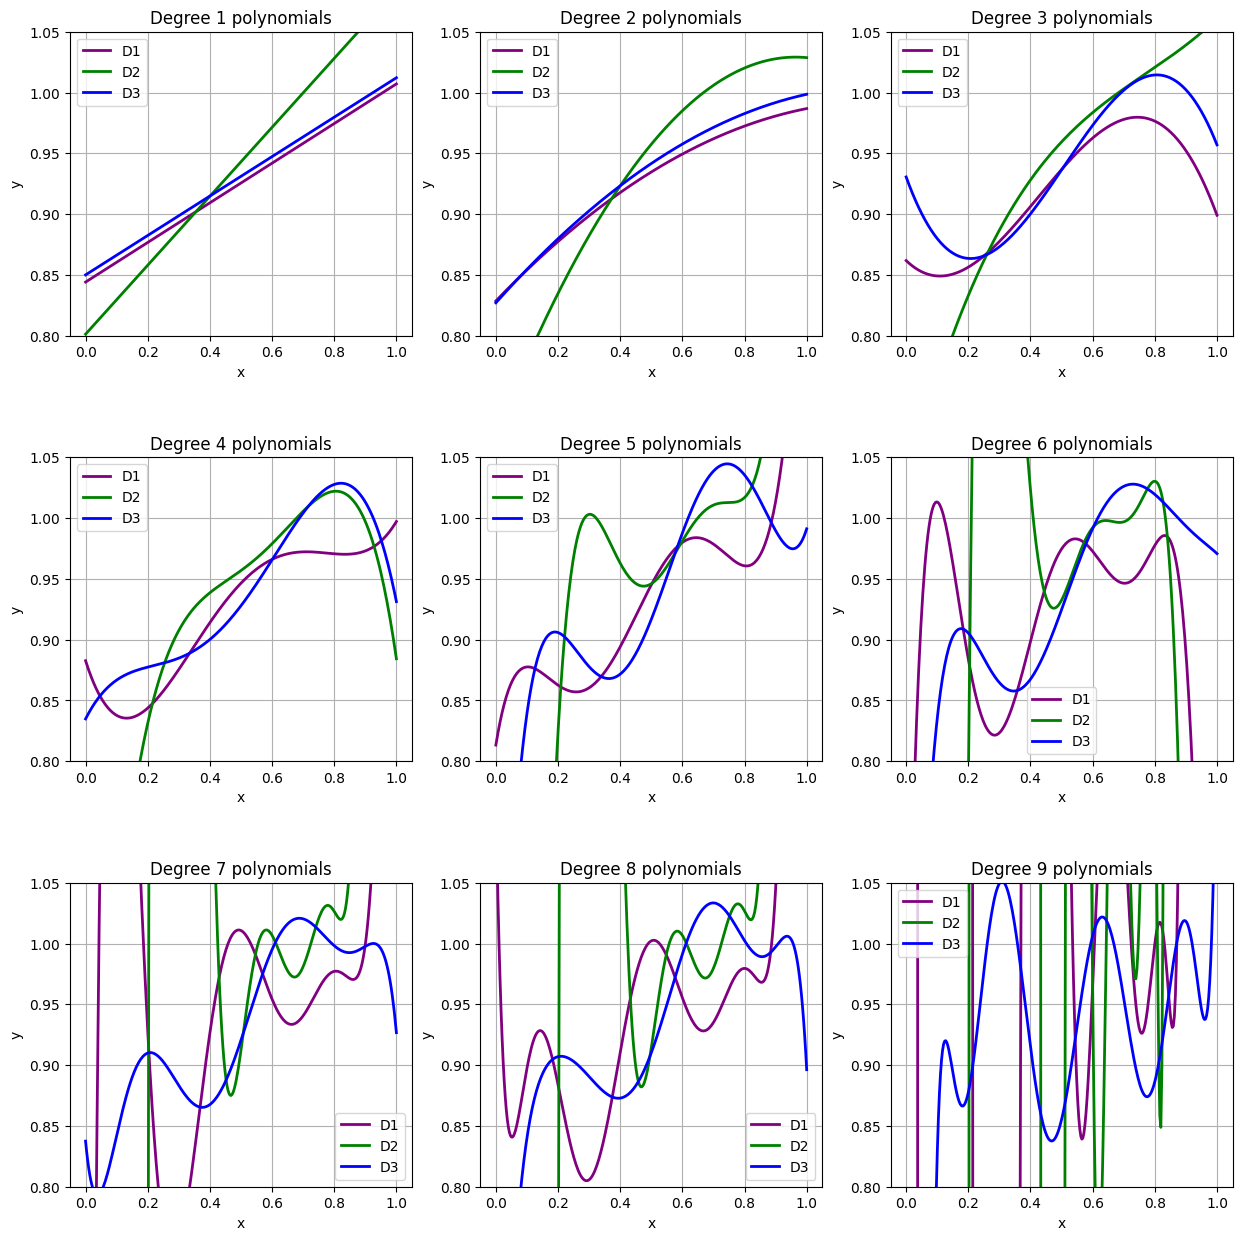

In [38]:
# Tạo lưới 3x3 cho các biểu đồ từ bậc 1 đến bậc 9
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)

# Vẽ các mô hình hồi quy cho mỗi bậc đa thức
x_vals = np.linspace(0, 1, 300)
colors = ['purple', 'green', 'blue']

for i, degree in enumerate(degrees):
    ax = axes[i // 3, i % 3]
    for idx, (name, data) in enumerate(datasets.items()):
        X_train, Y_train = data["X_train"], data["Y_train"]

        # Huấn luyện mô hình đa thức với bậc 'degree'
        coeffs = np.polyfit(X_train, Y_train, degree)
        model = np.poly1d(coeffs)

        # Vẽ đường hồi quy
        ax.plot(x_vals, model(x_vals), color=colors[idx], label=name, linewidth=2)

    ax.set_title(f'Degree {degree} polynomials')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim(0.8, 1.05)
    ax.legend()
    ax.grid(True)

plt.show()


**Experiment 2**

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập random seed với MSSV
MSSV = 23521455
np.random.seed(MSSV)

# Số điểm dữ liệu cho tập train và test
N_train = 100
N_test = 100

# Hàm tạo dữ liệu dựa trên hàm mục tiêu và thêm nhiễu
def generate_data(N):
    X = np.random.uniform(0, 1, N)
    Y = np.sin(1 + X**2) + np.random.normal(0, 0.03, N)
    return X, Y

# Tạo ba bộ dữ liệu (D1, D2, D3)
datasets = {}
for i in range(1, 4):
    X_train, Y_train = generate_data(N_train)
    X_test, Y_test = generate_data(N_test)
    datasets[f"D{i}"] = {"X_train": X_train, "Y_train": Y_train, "X_test": X_test, "Y_test": Y_test}


In [40]:
def evaluate_model(X_train, Y_train, X_test, Y_test, degree):
    # Khớp mô hình đa thức
    coeffs = np.polyfit(X_train, Y_train, degree)
    model = np.poly1d(coeffs)

    # Tính toán Ein và Eout
    Ein = np.mean((Y_train - model(X_train))**2)
    Eout = np.mean((Y_test - model(X_test))**2)

    return Ein, Eout


In [41]:
# Thực hiện thí nghiệm cho các bậc từ 1 đến 9 và lưu kết quả
results = []
degrees = range(1, 10)

for dataset_name, data in datasets.items():
    X_train, Y_train = data["X_train"], data["Y_train"]
    X_test, Y_test = data["X_test"], data["Y_test"]

    for degree in degrees:
        Ein, Eout = evaluate_model(X_train, Y_train, X_test, Y_test, degree)
        results.append({
            "Dataset": dataset_name,
            "Degree": degree,
            "Ein": Ein,
            "Eout": Eout
        })


In [42]:
import pandas as pd

# Chuyển kết quả sang DataFrame để tiện hiển thị
results_df = pd.DataFrame(results)
print(results_df)


   Dataset  Degree       Ein      Eout
0       D1       1  0.001494  0.001761
1       D1       2  0.001011  0.001280
2       D1       3  0.000817  0.000935
3       D1       4  0.000814  0.000927
4       D1       5  0.000795  0.000922
5       D1       6  0.000782  0.000953
6       D1       7  0.000757  0.001052
7       D1       8  0.000739  0.001192
8       D1       9  0.000739  0.001222
9       D2       1  0.001343  0.001899
10      D2       2  0.000989  0.001214
11      D2       3  0.000750  0.000903
12      D2       4  0.000739  0.000901
13      D2       5  0.000738  0.000903
14      D2       6  0.000738  0.000903
15      D2       7  0.000737  0.000917
16      D2       8  0.000730  0.000999
17      D2       9  0.000730  0.000971
18      D3       1  0.002127  0.001993
19      D3       2  0.001545  0.001386
20      D3       3  0.001124  0.000968
21      D3       4  0.001122  0.000958
22      D3       5  0.001115  0.000954
23      D3       6  0.001114  0.000951
24      D3       7  0.001

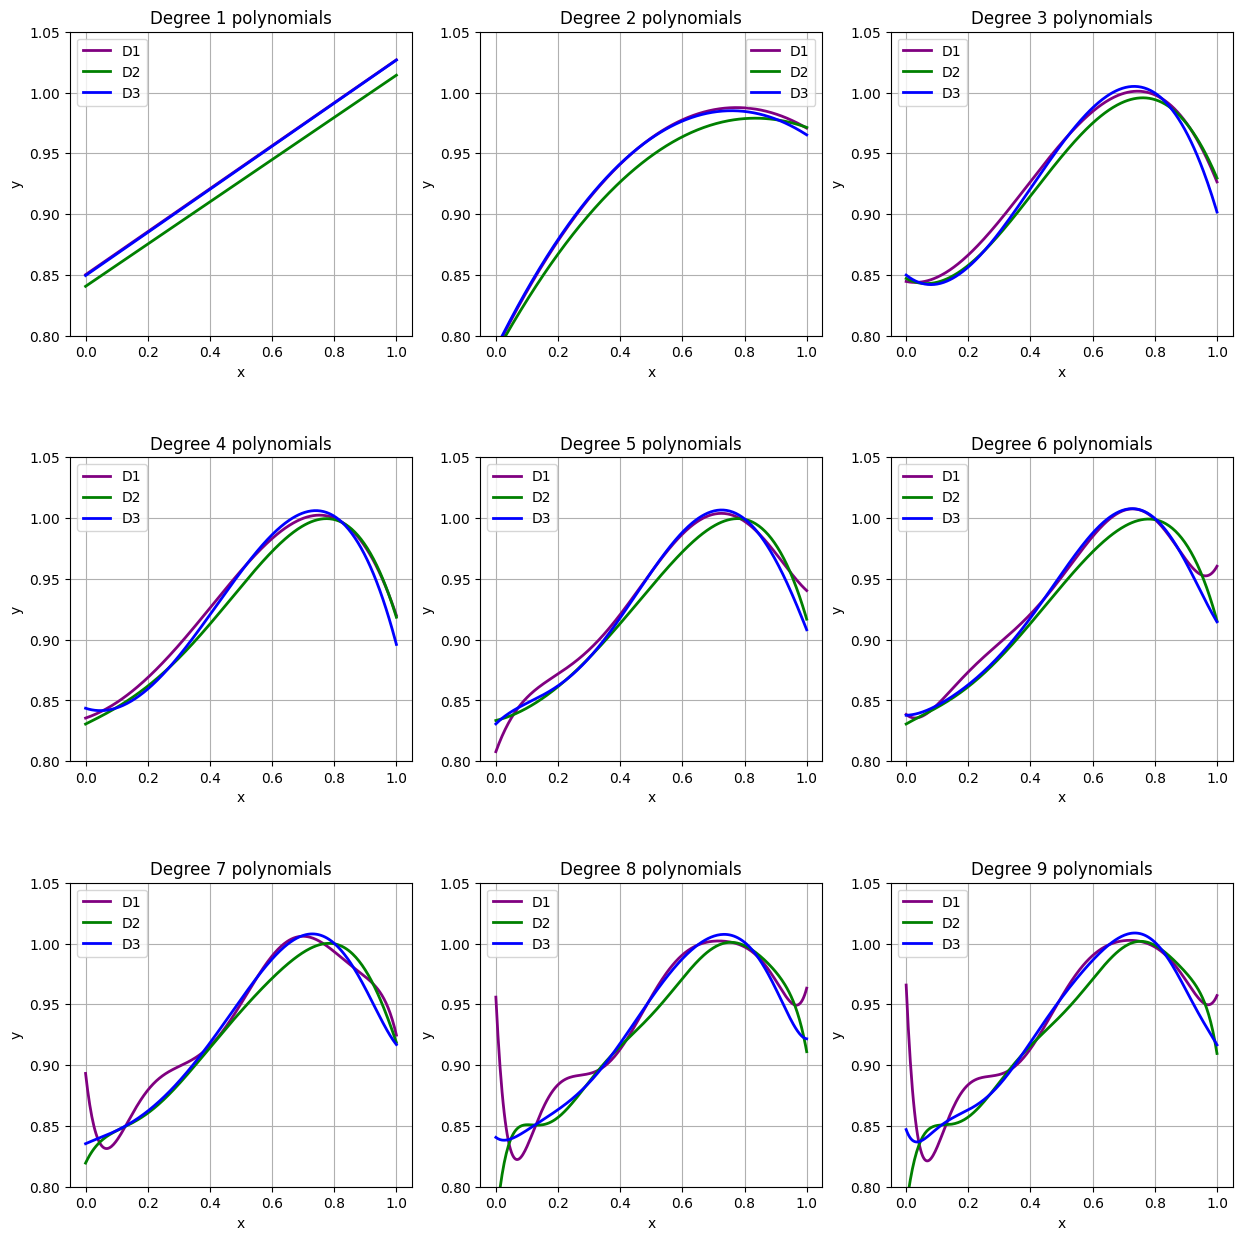

In [43]:
# Tạo lưới 3x3 cho các biểu đồ từ bậc 1 đến bậc 9
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)

# Vẽ các mô hình hồi quy cho mỗi bậc đa thức
x_vals = np.linspace(0, 1, 300)
colors = ['purple', 'green', 'blue']

for i, degree in enumerate(range(1, 10)):
    ax = axes[i // 3, i % 3]
    for idx, (name, data) in enumerate(datasets.items()):
        X_train, Y_train = data["X_train"], data["Y_train"]

        # Huấn luyện mô hình đa thức với bậc 'degree'
        coeffs = np.polyfit(X_train, Y_train, degree)
        model = np.poly1d(coeffs)

        # Vẽ đường hồi quy
        ax.plot(x_vals, model(x_vals), color=colors[idx], label=name, linewidth=2)

    ax.set_title(f'Degree {degree} polynomials')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim(0.8, 1.05)
    ax.legend()
    ax.grid(True)

plt.show()


**Experiment 3**

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập random seed với MSSV
MSSV = 23521455
np.random.seed(MSSV)

# Số điểm dữ liệu cho tập train và test
N_train = 1000
N_test = 1000

# Hàm tạo dữ liệu dựa trên hàm mục tiêu và thêm nhiễu
def generate_data(N):
    X = np.random.uniform(0, 1, N)
    Y = np.sin(1 + X**2) + np.random.normal(0, 0.03, N)
    return X, Y

# Tạo ba bộ dữ liệu (D1, D2, D3)
datasets = {}
for i in range(1, 4):
    X_train, Y_train = generate_data(N_train)
    X_test, Y_test = generate_data(N_test)
    datasets[f"D{i}"] = {"X_train": X_train, "Y_train": Y_train, "X_test": X_test, "Y_test": Y_test}


In [45]:
def evaluate_model(X_train, Y_train, X_test, Y_test, degree):
    # Khớp mô hình đa thức
    coeffs = np.polyfit(X_train, Y_train, degree)
    model = np.poly1d(coeffs)

    # Tính toán Ein và Eout
    Ein = np.mean((Y_train - model(X_train))**2)
    Eout = np.mean((Y_test - model(X_test))**2)

    return Ein, Eout


In [46]:
# Thực hiện thí nghiệm cho các bậc từ 1 đến 9 và lưu kết quả
results = []
degrees = range(1, 10)

for dataset_name, data in datasets.items():
    X_train, Y_train = data["X_train"], data["Y_train"]
    X_test, Y_test = data["X_test"], data["Y_test"]

    for degree in degrees:
        Ein, Eout = evaluate_model(X_train, Y_train, X_test, Y_test, degree)
        results.append({
            "Dataset": dataset_name,
            "Degree": degree,
            "Ein": Ein,
            "Eout": Eout
        })


In [47]:
import pandas as pd

# Chuyển kết quả sang DataFrame để tiện hiển thị
results_df = pd.DataFrame(results)
print(results_df)


   Dataset  Degree       Ein      Eout
0       D1       1  0.001815  0.001719
1       D1       2  0.001361  0.001270
2       D1       3  0.001000  0.000927
3       D1       4  0.000995  0.000919
4       D1       5  0.000994  0.000916
5       D1       6  0.000994  0.000916
6       D1       7  0.000987  0.000927
7       D1       8  0.000984  0.000932
8       D1       9  0.000982  0.000938
9       D2       1  0.001703  0.001631
10      D2       2  0.001288  0.001273
11      D2       3  0.000927  0.000973
12      D2       4  0.000926  0.000968
13      D2       5  0.000925  0.000968
14      D2       6  0.000920  0.000978
15      D2       7  0.000918  0.000977
16      D2       8  0.000918  0.000976
17      D2       9  0.000916  0.000975
18      D3       1  0.001759  0.001606
19      D3       2  0.001284  0.001218
20      D3       3  0.000886  0.000880
21      D3       4  0.000877  0.000870
22      D3       5  0.000877  0.000871
23      D3       6  0.000877  0.000871
24      D3       7  0.000

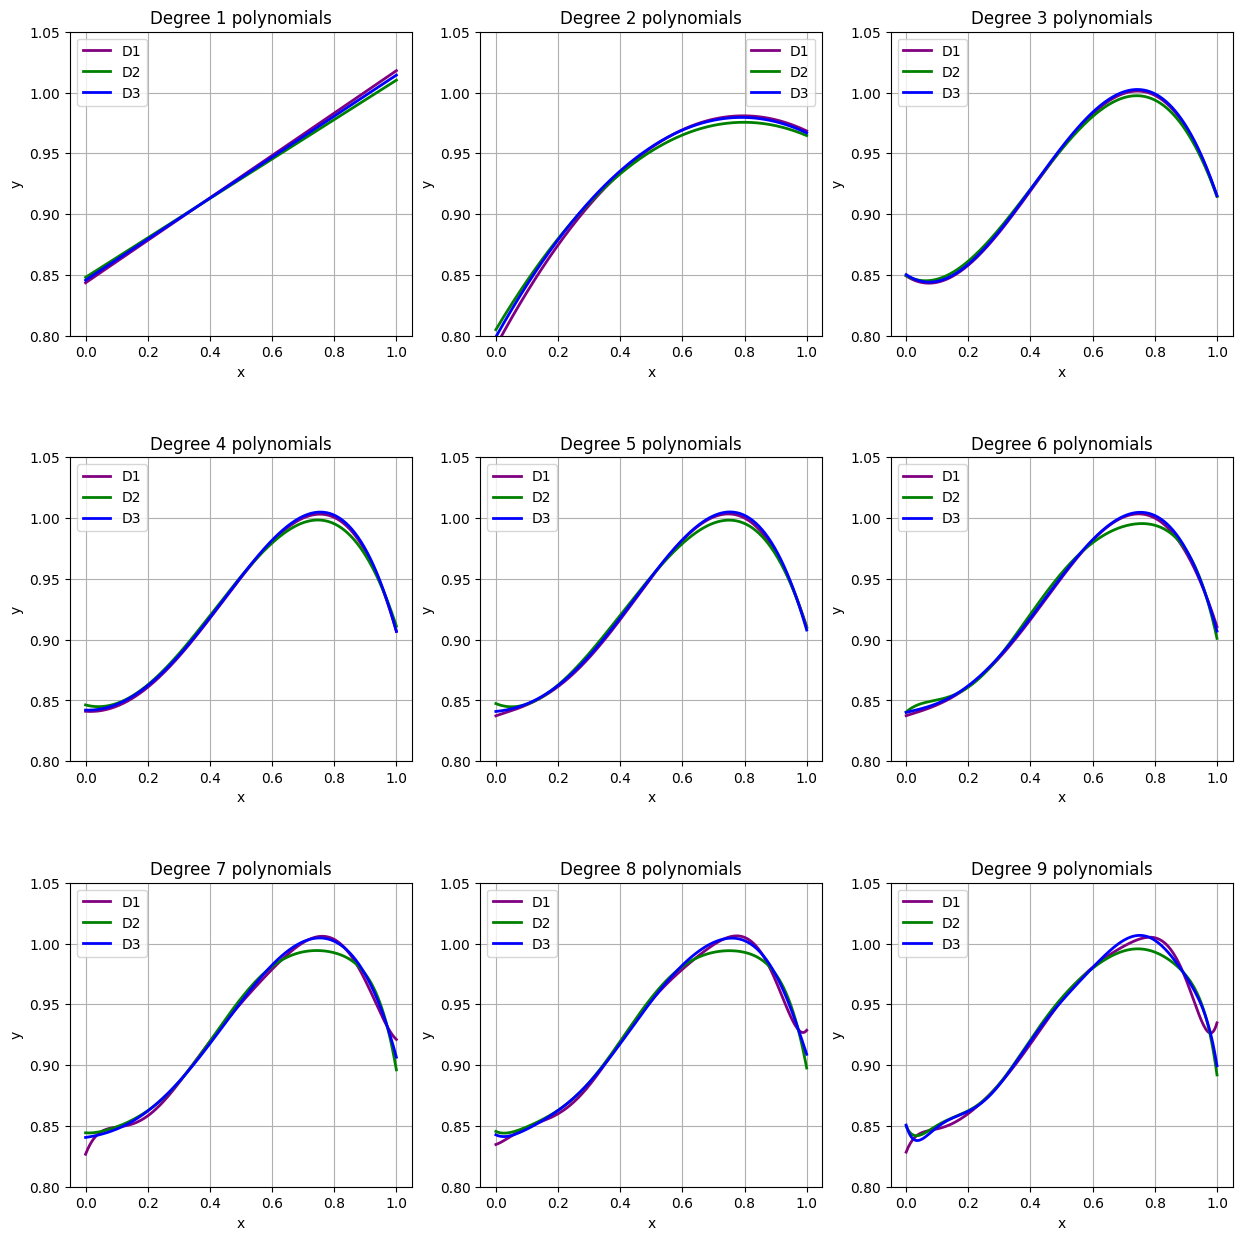

In [48]:
# Tạo lưới 3x3 cho các biểu đồ từ bậc 1 đến bậc 9
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)

# Vẽ các mô hình hồi quy cho mỗi bậc đa thức
x_vals = np.linspace(0, 1, 300)
colors = ['purple', 'green', 'blue']

for i, degree in enumerate(degrees):
    ax = axes[i // 3, i % 3]
    for idx, (name, data) in enumerate(datasets.items()):
        X_train, Y_train = data["X_train"], data["Y_train"]

        # Huấn luyện mô hình đa thức với bậc 'degree'
        coeffs = np.polyfit(X_train, Y_train, degree)
        model = np.poly1d(coeffs)

        # Vẽ đường hồi quy
        ax.plot(x_vals, model(x_vals), color=colors[idx], label=name, linewidth=2)

    ax.set_title(f'Degree {degree} polynomials')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim(0.8, 1.05)
    ax.legend()
    ax.grid(True)

plt.show()


### Trả lời câu hỏi về Bias và Variance

1. **Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?**
   - Khi độ phức tạp của mô hình tăng lên (bậc đa thức tăng), **bias** có xu hướng giảm. Các mô hình phức tạp hơn có khả năng mô phỏng tốt hơn các xu hướng trong dữ liệu, do đó bias sẽ nhỏ hơn. Tuy nhiên, nếu độ phức tạp quá cao, mô hình có thể dễ bị **overfitting**.

2. **Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?**
   - Khi độ phức tạp của mô hình tăng lên, **variance** của mô hình cũng tăng. Điều này có nghĩa là mô hình trở nên nhạy cảm hơn với các thay đổi nhỏ trong dữ liệu, dẫn đến kết quả dao động lớn giữa các tập dữ liệu khác nhau. Khi mô hình có variance cao, nó có thể khớp tốt trên tập huấn luyện nhưng không tổng quát hóa tốt trên tập kiểm tra, dẫn đến **overfitting**.

3. **Tăng kích thước tập train ảnh hưởng thế nào đến bias?**
   - Tăng kích thước tập train thường **không ảnh hưởng nhiều đến bias**. Bias chủ yếu phụ thuộc vào độ phức tạp của mô hình chứ không phải kích thước dữ liệu. Một mô hình đơn giản sẽ vẫn có bias cao ngay cả khi tập dữ liệu lớn, và một mô hình phức tạp sẽ có bias thấp.

4. **Tăng kích thước tập train ảnh hưởng thế nào đến variance?**
   - Tăng kích thước tập train giúp **giảm variance** của mô hình. Với nhiều dữ liệu hơn, các mô hình phức tạp có thể học một cách ổn định hơn và ít bị ảnh hưởng bởi các điểm nhiễu, do đó variance giảm. Điều này có nghĩa là khi tập dữ liệu đủ lớn, các mô hình phức tạp có thể tận dụng khả năng linh hoạt của chúng mà không dẫn đến overfitting.
